# Pretest analysis

Selection of mooney set

In [2]:
import glob, os #to work with paths
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt # roughly ~base R plotting functionality
import pandas as pd #roughly ~base R & tidyr functionality 
import seaborn as sns #roughly ~ggplot2 functionality
import scipy.stats  as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

#to make the plots appear inline, and saved in notebook:
%matplotlib inline
sns.set_context("talk") # seaborn function to make plots according to purpose (talk, paper, poster, notebook)

# We'll show people what version we use
import sys
print('Matplotlib Version: ' + mpl.__version__)
print('NumPy Version: ' + np.version.full_version)
print('Pandas Version:', pd.__version__)
print('Python Version: ' + sys.version)

import datetime
now  = datetime.datetime.now().isoformat()
print('Ran on ' + now)

Matplotlib Version: 3.1.1
NumPy Version: 1.17.0
Pandas Version: 0.25.0
Python Version: 3.7.3 (default, Oct  7 2019, 12:56:13) 
[GCC 8.3.0]
Ran on 2020-02-10T17:01:47.304811


In [3]:
!ls data/ #we can use shell commands to see where the data is (ls=dir on windows)

bp1.csv  ck1.csv  CL2.csv  GP1.csv  JW2.csv   NVH1.csv
bp2.csv  ck2.csv  EV1.csv  GP2.csv  JWP1.csv  NVH2.csv
CAL.csv  CL1.csv  EV2.csv  JW1.csv  JWP2.csv  PG1.csv


In [91]:

dffull = pd.DataFrame()

all_files = glob.glob(os.path.join('data/', "*.csv")) # get list of individual data files

for f in all_files:
    print(f)
    df = pd.read_csv(f, index_col=0)
    df = df[df.test_part.isin(['recognized', 'aha'])]
    df = df[['subject','currentStim','recognized','aha']]
    df = df.replace(np.NaN,'')
    df['aha'] = df['aha'].apply(str)
    df = df.groupby('currentStim',as_index=False).agg(''.join)
    df['recognized'] = np.where(df.recognized == "y", 1, 0)
    df['aha'] = pd.to_numeric(df['aha'])
    dffull = pd.concat([dffull,df], ignore_index=True)

print('Variables:\n', dffull.columns)
print('variables:\n', dffull.dtypes)
print('nb of participants:', len(dffull['subject'].unique()))
print(len(dffull))
# Save full data
dffull.to_csv('dffull.csv')
df= dffull

data/CL1.csv
data/bp2.csv
data/CAL.csv
data/NVH1.csv
data/JW1.csv
data/EV2.csv
data/JWP2.csv
data/ck1.csv
data/NVH2.csv
data/CL2.csv
data/ck2.csv
data/EV1.csv
data/GP1.csv
data/JWP1.csv
data/bp1.csv
data/PG1.csv
data/JW2.csv
data/GP2.csv
Variables:
 Index(['currentStim', 'subject', 'recognized', 'aha'], dtype='object')
variables:
 currentStim     object
subject         object
recognized       int64
aha            float64
dtype: object
nb of participants: 10
6795


### Mean perceived recognition:

In [92]:
df.recognized.mean()

0.4975717439293598

### Mean experienced aha:

In [93]:
df.aha.mean()

3.3526122148638704

### Missing data?

In [94]:
df.isnull().sum()

currentStim    0
subject        0
recognized     0
aha            0
dtype: int64

### Aha distribution

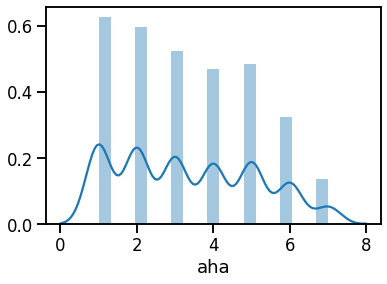

In [95]:
sns.distplot(df.aha)

## Who of our subjects had higher perceived recognition scores, or aha experiences?

In [27]:
df.groupby(['subject']).describe().reset_index()

subject recognized                                                 aha  \
                 count      mean       std  min  25%  50%  75%  max  count   
0    CALCAL      378.0  0.325397  0.469144  0.0  0.0  0.0  1.0  1.0  378.0   
1      CLCL      755.0  0.476821  0.499794  0.0  0.0  0.0  1.0  1.0  755.0   
2      EVEV      755.0  0.523179  0.499794  0.0  0.0  1.0  1.0  1.0  755.0   
3      GPGP      754.0  0.312997  0.464021  0.0  0.0  0.0  1.0  1.0  754.0   
4  J.W.J.W.      755.0  0.515232  0.500099  0.0  0.0  1.0  1.0  1.0  755.0   
5      JWJW      755.0  0.622517  0.485079  0.0  0.0  1.0  1.0  1.0  755.0   
6    NVHNVH      755.0  0.505960  0.500296  0.0  0.0  1.0  1.0  1.0  755.0   
7      PGPG      378.0  0.433862  0.496263  0.0  0.0  0.0  1.0  1.0  378.0   
8      bpbp      755.0  0.637086  0.481159  0.0  0.0  1.0  1.0  1.0  755.0   
9      ckck      755.0  0.504636  0.500310  0.0  0.0  1.0  1.0  1.0  755.0   

                                                
       mean       std  min  25%  50%  75%  max  
0  5.267196  1.660920  1.0  4.0  6.0  7.0  7.0  
1  2.913907  1.446391  1.0  2.0  3.0  4.0  7.0  
2  4.064901  1.438307  1.0  3.0  4.0  5.0  7.0  
3  2.135279  1.334098  1.0  1.0  2.0  3.0  6.0  
4  4.192053  1.935002  1.0  2.0  4.0  6.0  7.0  
5  3.527152  1.517446  1.0  2.0  3.0  5.0  7.0  
6  4.231788  1.466892  1.0  3.0  4.0  5.0  7.0  
7  2.777778  1.702965  1.0  1.0  2.0  4.0  7.0  
8  2.634437  1.468098  1.0  1.0  2.0  4.0  7.0  
9  2.449007  1.736939  1.0  1.0  2.0  4.0  7.0

## Summarize data per image:

In [9]:
df.groupby(['currentStim']).describe().reset_index()

currentStim recognized                                          \
                              count      mean       std  min  25%  50%  75%   
0    ../img/tt/001tt.jpg        9.0  0.111111  0.333333  0.0  0.0  0.0  0.0   
1    ../img/tt/007tt.jpg        9.0  0.222222  0.440959  0.0  0.0  0.0  0.0   
2    ../img/tt/008tt.jpg        9.0  0.333333  0.500000  0.0  0.0  0.0  1.0   
3    ../img/tt/009tt.jpg        9.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
4    ../img/tt/010tt.jpg        9.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
..                   ...        ...       ...       ...  ...  ...  ...  ...   
750  ../img/tt/598tt.jpg        9.0  0.111111  0.333333  0.0  0.0  0.0  0.0   
751  ../img/tt/599tt.jpg        9.0  0.444444  0.527046  0.0  0.0  0.0  1.0   
752  ../img/tt/600tt.jpg        9.0  0.222222  0.440959  0.0  0.0  0.0  0.0   
753  ../img/tt/601tt.jpg        9.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
754  ../img/tt/603tt.jpg        9.0  0.111111  0.333333  0.0  0.0  0.0  0.0   

           aha                                               
     max count      mean       std  min  25%  50%  75%  max  
0    1.0   9.0  3.666667  2.397916  1.0  2.0  3.0  5.0  7.0  
1    1.0   9.0  4.666667  1.802776  2.0  3.0  5.0  6.0  7.0  
2    1.0   9.0  3.777778  1.787301  1.0  2.0  5.0  5.0  6.0  
3    0.0   9.0  2.111111  1.269296  1.0  1.0  2.0  2.0  5.0  
4    0.0   9.0  3.777778  1.641476  1.0  3.0  4.0  5.0  6.0  
..   ...   ...       ...       ...  ...  ...  ...  ...  ...  
750  1.0   9.0  3.555556  1.666667  1.0  2.0  4.0  5.0  6.0  
751  1.0   9.0  4.000000  2.000000  1.0  2.0  4.0  5.0  7.0  
752  1.0   9.0  2.222222  1.563472  1.0  1.0  2.0  2.0  6.0  
753  0.0   9.0  1.777778  1.092906  1.0  1.0  1.0  2.0  4.0  
754  1.0   9.0  4.333333  1.000000  3.0  4.0  4.0  5.0  6.0  

[755 rows x 17 columns]

## Make column to merge on

In [106]:
m = df.groupby('currentStim').agg(
    recognized=pd.NamedAgg(column='recognized', aggfunc='mean'),
    recognizedstd=pd.NamedAgg(column='recognized', aggfunc='std'),
    aha=pd.NamedAgg(column='aha', aggfunc='mean'),
    ahastd=pd.NamedAgg(column='aha', aggfunc='std')).reset_index()
m['imgName'] = m.currentStim.str.extract('(\d+)')
m['imgName'] = m['imgName'].astype(int)

In [107]:
m.head()

,currentStim,recognized,recognizedstd,aha,ahastd,imgName
0,../img/tt/001tt.jpg,0.111111,0.333333,3.666667,2.397916,1
1,../img/tt/007tt.jpg,0.222222,0.440959,4.666667,1.802776,7
2,../img/tt/008tt.jpg,0.333333,0.500000,3.777778,1.787301,8
3,../img/tt/009tt.jpg,0.000000,0.000000,2.111111,1.269296,9
4,../img/tt/010tt.jpg,0.000000,0.000000,3.777778,1.641476,10


## Correlation between perceived recognition and aha?

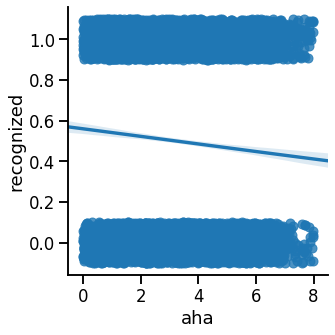

In [108]:
sns.lmplot(x="aha", y="recognized", data=df,logistic=True, y_jitter=.1, x_jitter=1);

In [109]:
r, p = stats.pearsonr(df.aha, df.recognized)
print('pearson r =', round(r,3), 'p-value = ', round(p,3))

pearson r = -0.067 p-value =  0.0


Lower recognition is somewhat more likely to elicit higher aha

## Read in complexity measures

In [110]:
dfc = pd.read_csv('../complexity_measures/mooneyFeatures.csv')

In [24]:
dfc.head()

,imgName,entropyMooney,entropyGrayscale,structSim,selfSimilarityMooney,selfSimilarityGrayscale,PHOGcomplexityMooney,PHOGcomplexityGrayscale,anisotropyMooney,anisotropyGrayscale,edgeEntropyMooney,edgeEntropyGrayscale
0,1,1.756312,7.350505,0.354134,0.52439,0.56992,6.2874,21.0880,0.001429,0.001260,0.182302,0.573023
1,7,3.046183,7.834113,0.176417,0.65547,0.67581,10.7960,14.3860,0.000691,0.000292,0.259272,0.565986
2,8,2.098715,7.739233,0.304084,0.51810,0.53891,9.2955,11.0410,0.001570,0.000695,0.221323,0.407314
3,9,1.867433,7.753575,0.336164,0.44506,0.44753,7.3215,4.3294,0.001745,0.001266,0.193137,0.271203
4,10,1.597833,5.565031,0.090799,0.41812,0.54948,6.2084,7.2984,0.001604,0.000822,0.183774,0.478438


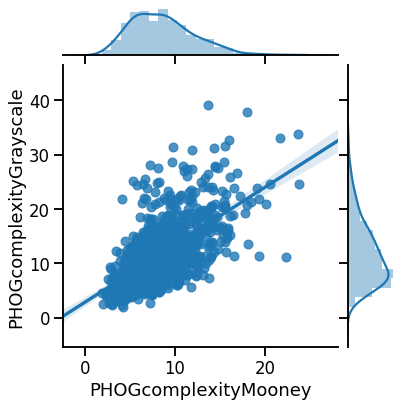

In [117]:
sns.jointplot(x="PHOGcomplexityMooney", y="PHOGcomplexityGrayscale", data=dfc, kind="reg");

In [112]:
r, p = stats.pearsonr(dfc.PHOGcomplexityMooney, dfc.PHOGcomplexityGrayscale)
print('pearson r =', round(r,3), 'p-value = ', round(p,3))

pearson r = 0.621 p-value =  0.0


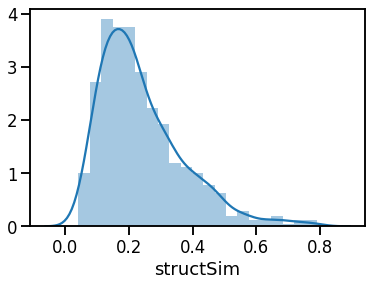

In [113]:
sns.distplot(dfc.structSim)

## Merge data of pretest and complexity measures

In [118]:
df= pd.merge(m, dfc, how='left', on='imgName')
df.head()

,currentStim,recognized,recognizedstd,aha,ahastd,imgName,entropyMooney,entropyGrayscale,structSim,selfSimilarityMooney,selfSimilarityGrayscale,PHOGcomplexityMooney,PHOGcomplexityGrayscale,anisotropyMooney,anisotropyGrayscale,edgeEntropyMooney,edgeEntropyGrayscale
0,../img/tt/001tt.jpg,0.111111,0.333333,3.666667,2.397916,1,1.756312,7.350505,0.354134,0.52439,0.56992,6.2874,21.0880,0.001429,0.001260,0.182302,0.573023
1,../img/tt/007tt.jpg,0.222222,0.440959,4.666667,1.802776,7,3.046183,7.834113,0.176417,0.65547,0.67581,10.7960,14.3860,0.000691,0.000292,0.259272,0.565986
2,../img/tt/008tt.jpg,0.333333,0.500000,3.777778,1.787301,8,2.098715,7.739233,0.304084,0.51810,0.53891,9.2955,11.0410,0.001570,0.000695,0.221323,0.407314
3,../img/tt/009tt.jpg,0.000000,0.000000,2.111111,1.269296,9,1.867433,7.753575,0.336164,0.44506,0.44753,7.3215,4.3294,0.001745,0.001266,0.193137,0.271203
4,../img/tt/010tt.jpg,0.000000,0.000000,3.777778,1.641476,10,1.597833,5.565031,0.090799,0.41812,0.54948,6.2084,7.2984,0.001604,0.000822,0.183774,0.478438


# Is there a correlation between structural similarity (mooney and grayscale) and to what extent people thought they recognized it? 

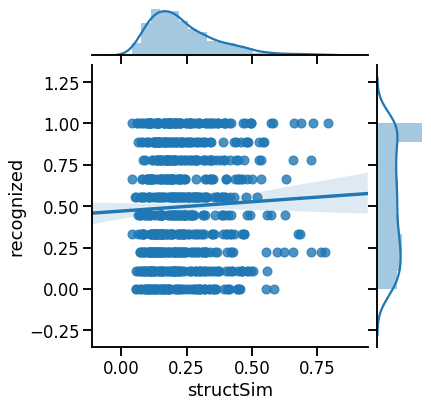

In [119]:
sns.jointplot(x="structSim", y="recognized", data=df, kind="reg");

In [120]:
r, p = stats.pearsonr(df.structSim, df.recognized)
print('pearson r =', round(r,3), 'p-value = ', round(p,3))

pearson r = 0.046 p-value =  0.211


No correlation whatsoever. Unexpected?

# Make correlation matrix

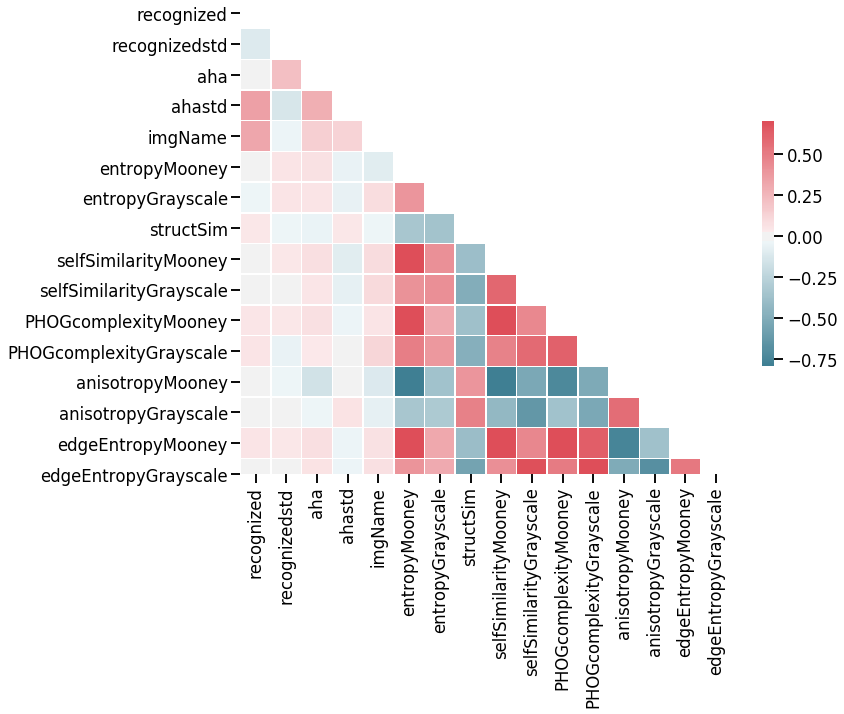

In [123]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Correlation between aha std and recognized?

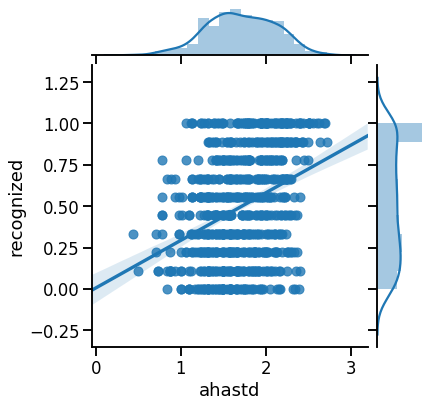

In [145]:
sns.jointplot(x="ahastd", y="recognized", data=df, kind="reg");

In [125]:
r, p = stats.pearsonr(df.ahastd, df.recognized)
print('pearson r =', round(r,3), 'p-value = ', round(p,3))

pearson r = 0.35 p-value =  0.0


If an image was more likely to be recognized, the aha was more variable (probably because people gave very high aha when they were wrong after all, while low aha when they were indeed right)

## Select images and see whether distribution of complexity measures is more or less retained

Cut-offs are rather arbitrary except that we want to keep the ones with some experienced aha/perceived 'fit' (>3.5 on 7-point scale, mean of whole set was 3.35), and the ones that aren't (perceived to be) recognized by all (here I chose for .6 instead of .5 because there might be some overestimation in the participants). 

In [178]:
len(df[(df.aha > 3.7) & (df.recognized < .8)])

203

In [177]:
df['selected'] = np.where(((df.aha > 3.5) & (df.recognized < .6)), 1, 0)

In [163]:
len(df[df.selected==1])

203

How many images where recognized by all participants (definitely excluded)?

In [168]:
len(m[m.recognized == 1])

94

In [158]:
len(df)

755

### Does this selection retain a range on the complexity measures?

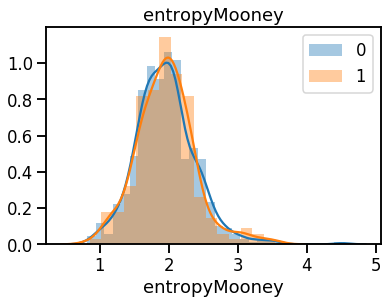

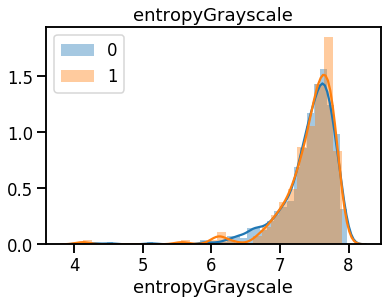

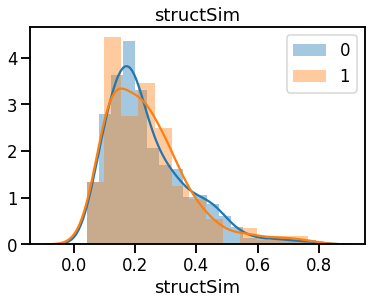

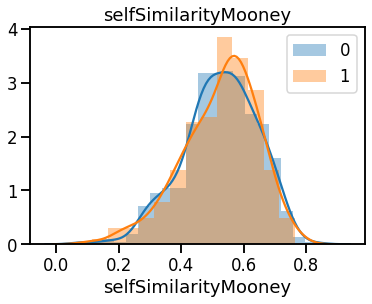

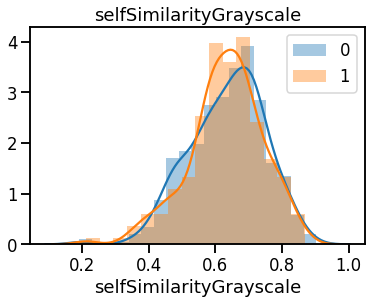

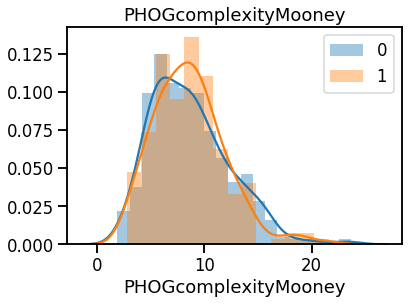

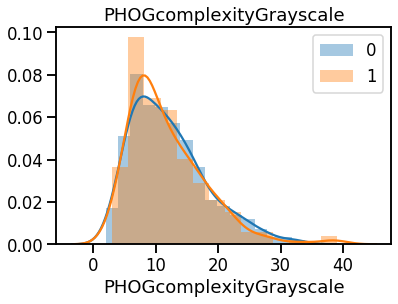

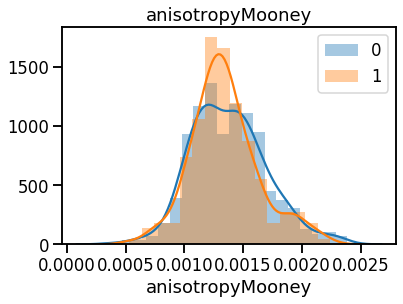

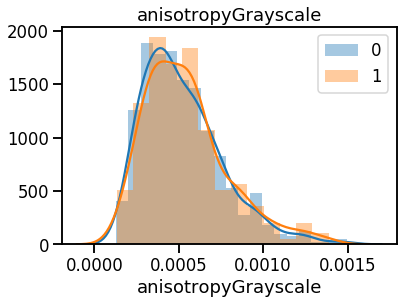

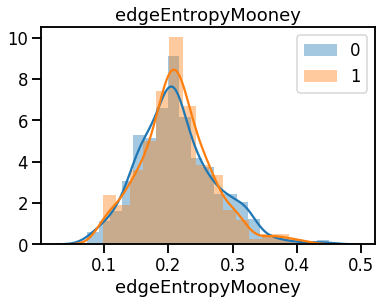

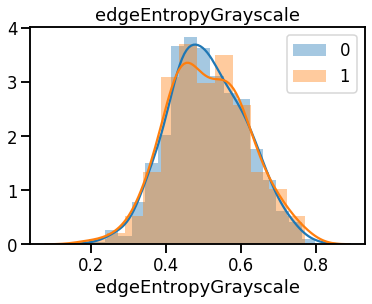

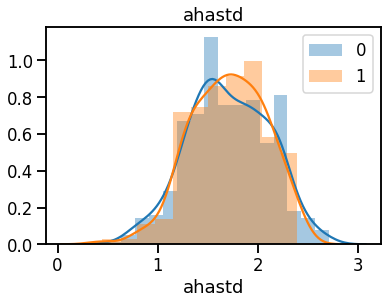

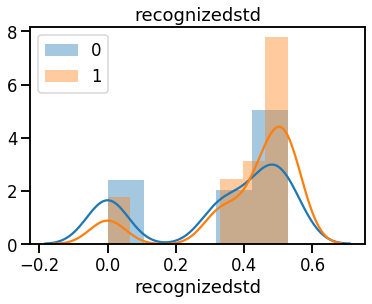

In [166]:
measures = list(df.columns[6:-1]) + ['ahastd', 'recognizedstd'] 

for measure in measures:
    conditions = [0, 1] # selected = 1
    
    plt.figure()
    for condition in conditions:
        sns.distplot(df[(df['selected'] == condition)][measure],label=condition).set_title(measure) 
        plt.legend()  
   